### Business case

* Create a predictive model using machine learning techniques to predict the price of the house given the various factors across the market.

# DOMAIN ANALYSIS

In [1]:
# importing libraries
import pandas as pd      # import pandas for analyzing, cleaning ,exploring and manipulating data
import numpy as np       # import numpy for working with mathematices part/numerical data
import seaborn as sns    # import seaborn for visualize data and plotting statistical graph
import matplotlib.pyplot as plt    # import matplotlib for visualize data and plotting statistical graph
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
import pickle     # used to save the model
import warnings   # import warnings
warnings.filterwarnings('ignore')   # used to ignore the warnings

In [2]:
df=pd.read_csv('data.csv',index_col=0)
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd        NaN   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [5]:
df.tail()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1456         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1457         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1458         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1459         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1460         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1456       Norm     1Fam     2Story            6            5       1999   
1457       Norm     1Fam     1Story            6            6       1978   
1458       Norm     1Fam     2Story            7            9       1941   
1459       Norm     1Fam     1Story            5            6       1950   
1460       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1456          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1457          1988     Gable  CompShg     Plywood     Plywood      Stone   
1458          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1459          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1460          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1456         0.0        TA        TA      PConc       Gd       TA   
1457       119.0        TA        TA     CBlock       Gd       TA   
1458         0.0        Ex        Gd      Stone       TA       Gd   
1459         0.0        TA        TA     CBlock       TA       TA   
1460         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1456           No          Unf           0          Unf           0   
1457           No          ALQ         790          Rec         163   
1458           No          GLQ         275          Unf           0   
1459           Mn          GLQ          49          Rec        1029   
1460           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1456        953          953    GasA        Ex          Y      SBrkr   
1457        589         1542    GasA        TA          Y      SBrkr   
1458        877         1152    GasA        Ex          Y      SBrkr   
1459          0         1078    GasA        Gd          Y      FuseA   
1460        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1456       953       694             0       1647             0             0   
1457      2073         0             0       2073             1             0   
1458      1188      1152             0       2340             0             0   
1459      1078   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [7]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [8]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [9]:
# applied a loop to check unique values of each column

for i in df.columns:
    a = df[i].unique()
    print("------")
    print(f"unique values in column'{i}':")
    print(a) # print the unique values of each Features


------
unique values in column'MSSubClass':
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
------
unique values in column'MSZoning':
['RL' 'RM' 'C (all)' 'FV' 'RH']
------
unique values in column'LotFrontage':
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
------
unique values in column'LotArea':
[ 8450  9600 11250 ... 17217 13175  9717]
------
unique values in column'Street':
['Pave' 'Grvl']
------
unique values in column'Alley':
[nan 'Grvl' 'Pave']
------
unique

# EDA

# 1. UNIVARIATE ANALYSIS

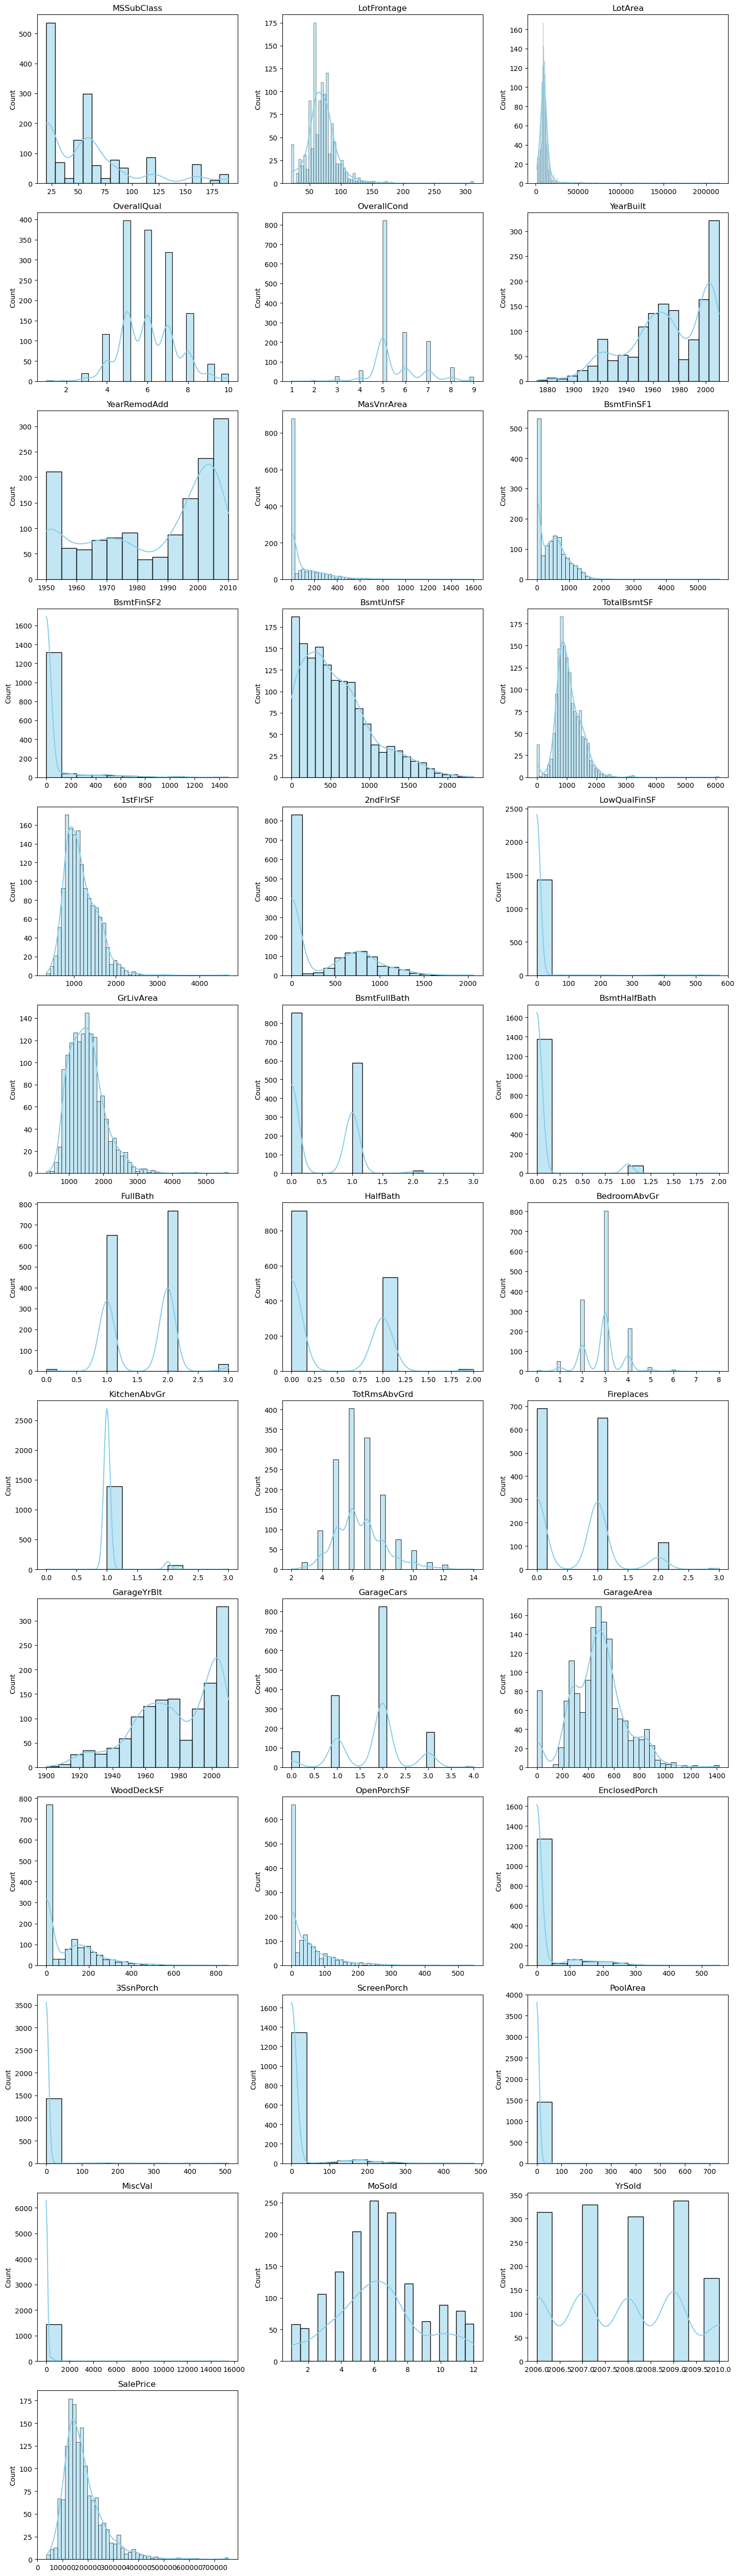

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

num_cols = len(numeric_df.columns)
cols = 3  # number of plots per row
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, column in enumerate(numeric_df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(numeric_df[column], kde=True, color='skyblue')
    plt.title(column, fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Analysis

* Most of the numerical columns not normally distributes so we can say that it follow right skew 

# 2. BIVARIATE ANALYSIS

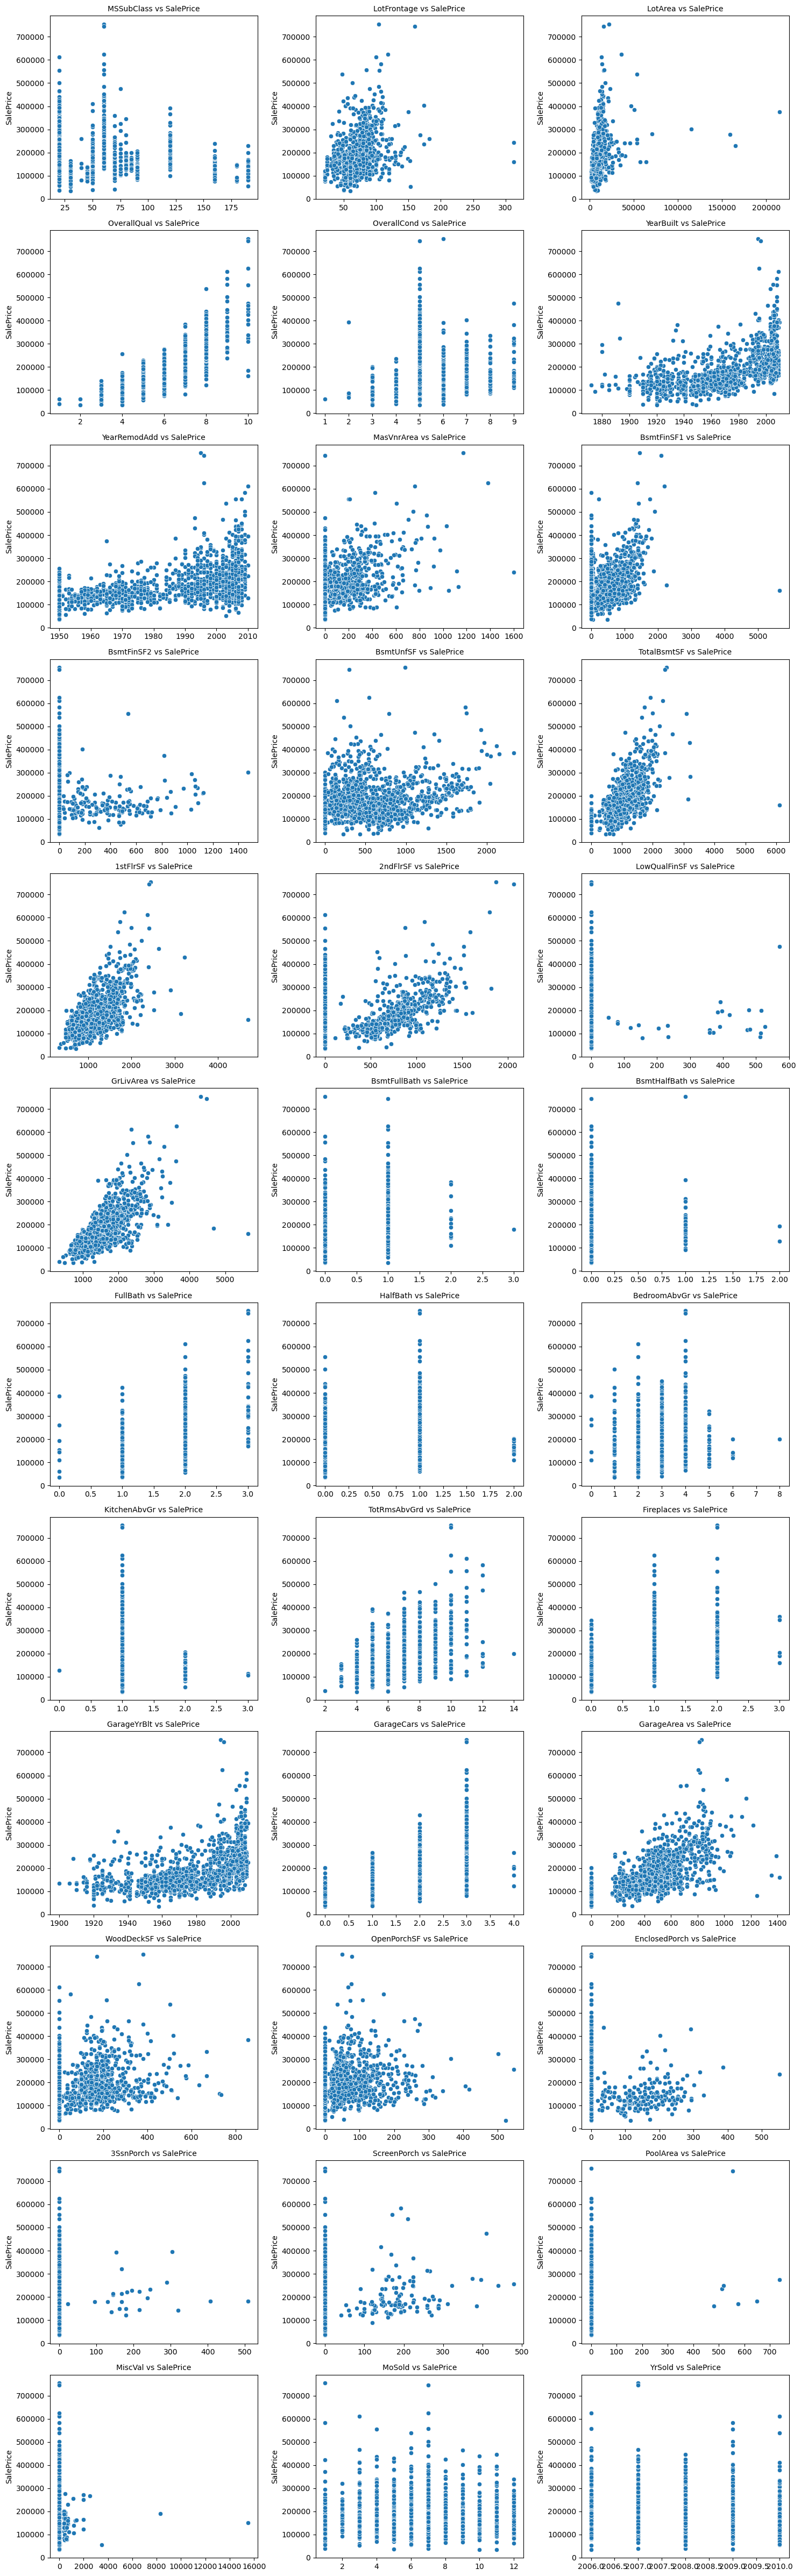

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Remove the target column from feature list
features = numeric_df.drop('SalePrice', axis=1).columns

num_cols = len(features)
cols = 3  # number of plots per row
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, column in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=df[column], y=df['SalePrice'])
    plt.title(f"{column} vs SalePrice", fontsize=10)
    plt.xlabel('')
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


### insights

House prices are most strongly influenced by quality, size, and age:

Top 3 Most Important columns:

House Quality (OverallQual)

Living Area Size (GrLivArea, TotalBsmtSF, FloorSF)

Home Age / Renovation (YearBuilt, YearRemodAdd)

Other features like porches, low-quality area, or lot frontage contribute very little.

## 3. Multivariante anaysis

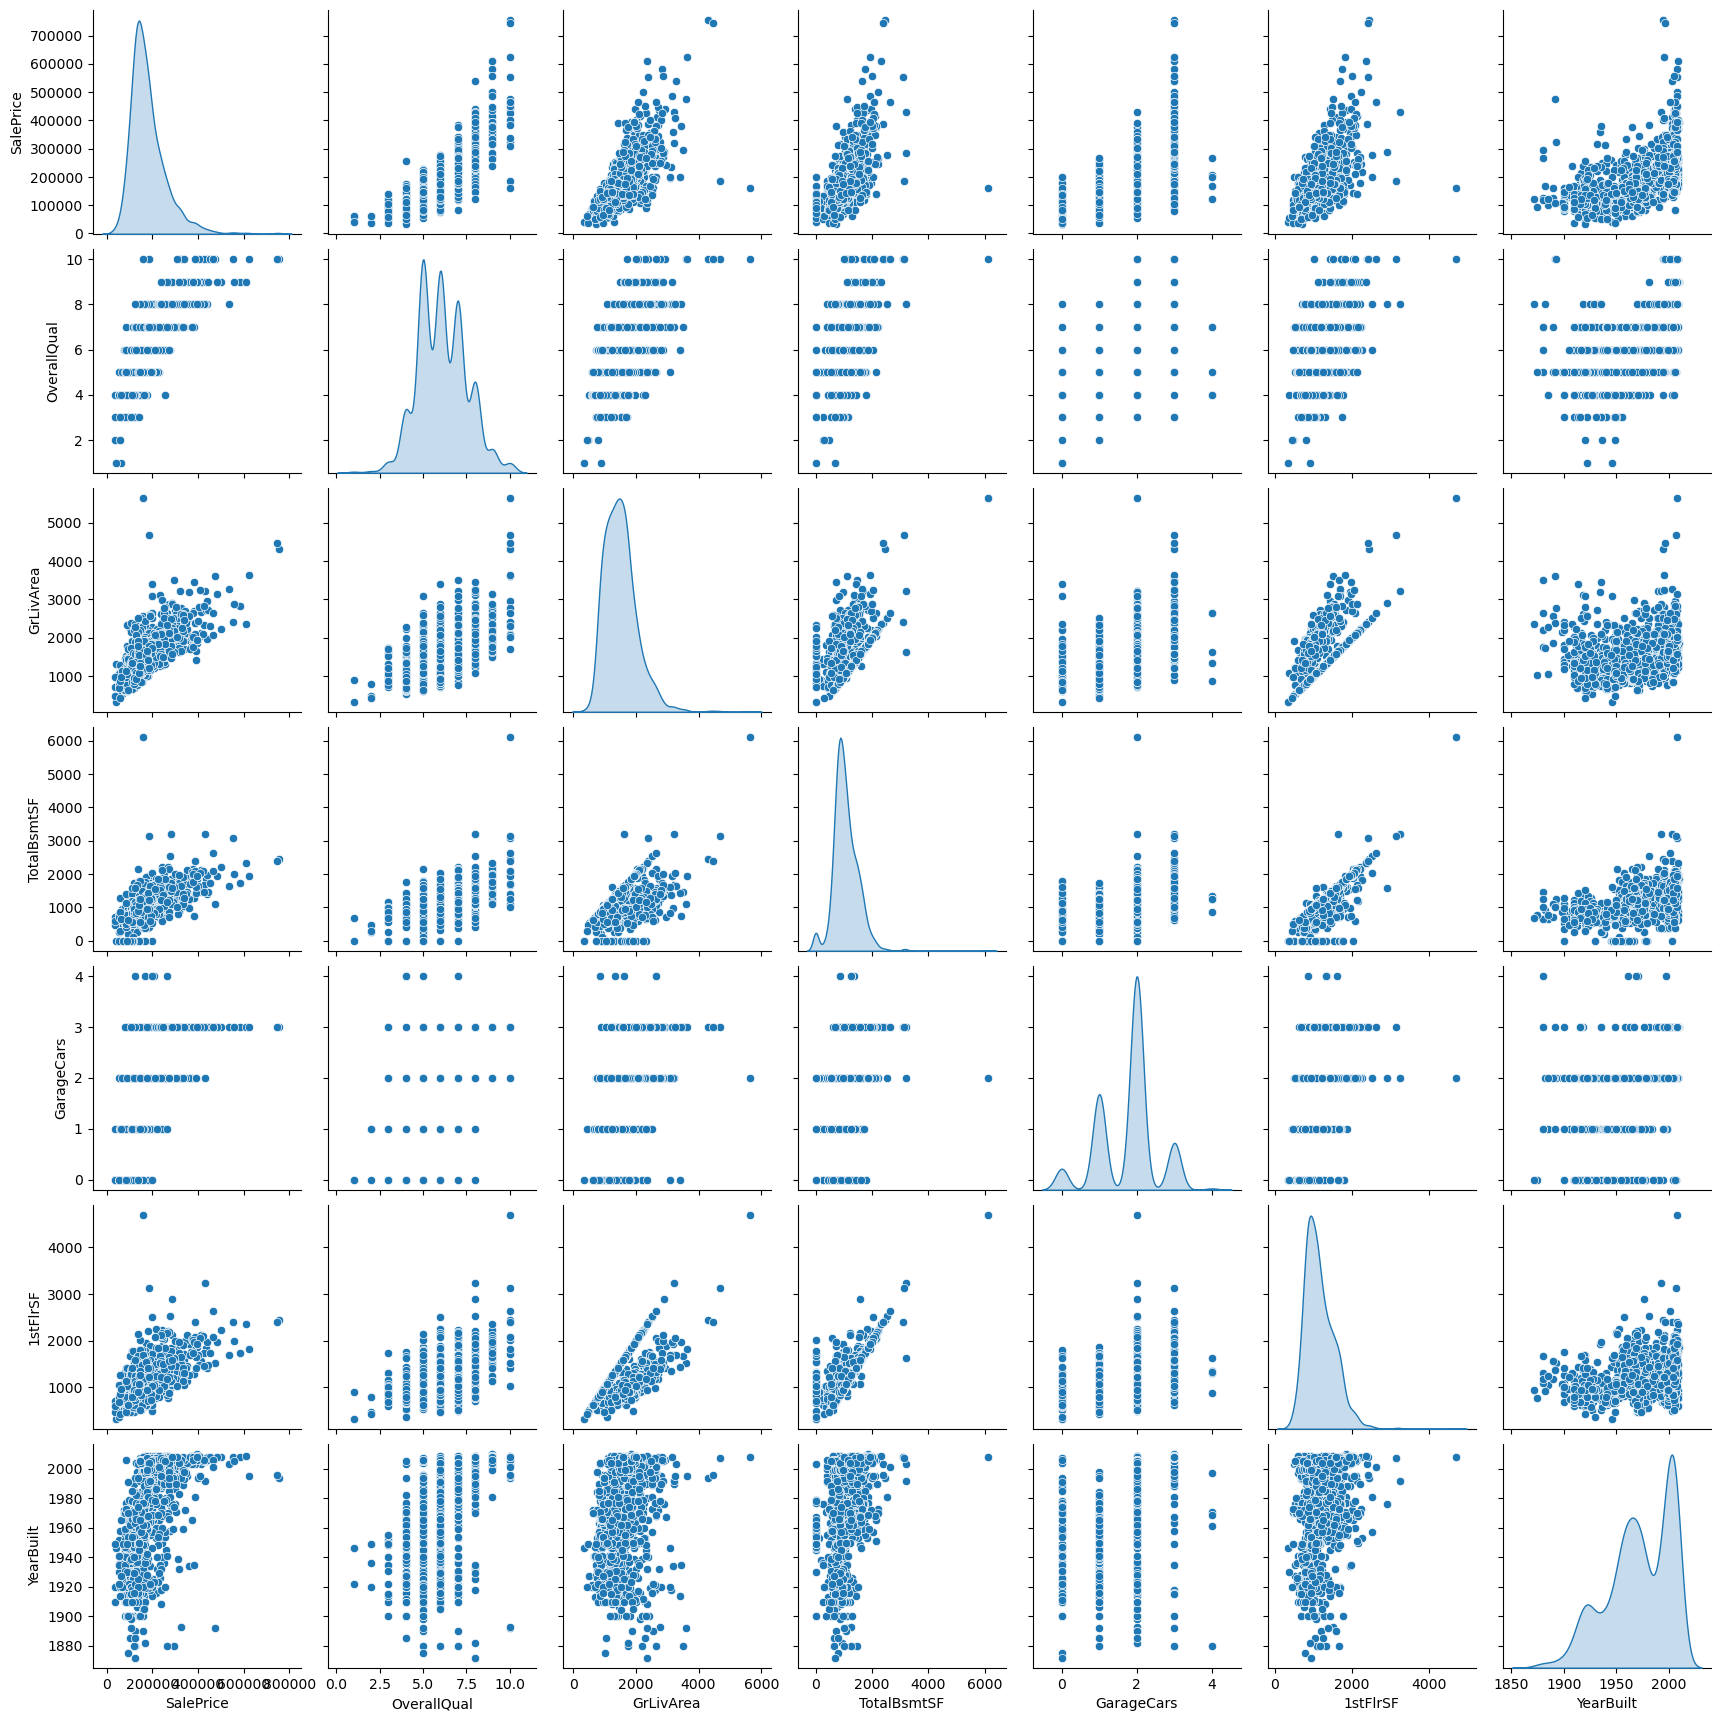

In [12]:
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 
                     'GarageCars', '1stFlrSF', 'YearBuilt']

sns.pairplot(df[selected_features], diag_kind="kde")
plt.show()

### Pairplot Insight

* Houses with higher quality, larger living area, and bigger basements clearly cluster at the higher SalePrice range.

* Newer and well-renovated houses also show a trend of higher prices.

## Feature Engineering

 ### Feature engineering is most important part of any Machine learning model , to make perfect and efficient model good feature engineering is must required


## 1 Data Preprocessing

In [13]:
# Step 1-Finding missing values
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [14]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [16]:
num_columns=['LotFrontage','GarageYrBlt']
cat_columns=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType',
             'GarageFinish','GarageQual','GarageCond']

In [17]:
# fill numerical columns with medium
df[num_columns]=df[num_columns].fillna(df[num_columns].median())

In [18]:
# fill categorical columns with mode
df[cat_columns]=df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [19]:
df.loc[df['MasVnrArea'].isnull(),'MasVnrArea']=0 # If a house doesn’t have any brick or stone on its walls, then MasVnrArea = 0.

In [20]:
df.loc[df['PoolQC'].isnull(),'PoolQC']='NoPool' # There are ~1460 houses total, and only a few (around 7) actually have pools.
                                                # That means the rest  have missing values (NaN) for PoolQC.

In [21]:
df.loc[df['Fence'].isnull(),'Fence']='NoFence' # There are about 1460 houses total in the dataset.
                                                # Only around 280 houses actually have a fence.
                                                # So the rest (~1179) have NaN because the fence quality does not exist for them.

In [22]:
df.loc[df['MiscFeature'].isnull(),'MiscFeature']='None'  # There are about 1460 houses total,and only ~54 houses have any “miscellaneous feature” so other have NaN value.

In [23]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

* Converting categorical data into numerical

In [24]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 37
Num of Categorical Features : 43
Num of Discrete Features : 18
Num of Continuous Features : 19


In [25]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Print each column with its unique values
for col in cat_cols:
    print(f"{col} : {df[col].unique()}")
    print("-"*50)


MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
--------------------------------------------------
Street : ['Pave' 'Grvl']
--------------------------------------------------
Alley : ['Grvl' 'Pave']
--------------------------------------------------
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
--------------------------------------------------
Utilities : ['AllPub' 'NoSeWa']
--------------------------------------------------
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
--------------------------------------------------
LandSlope : ['Gtl' 'Mod' 'Sev']
--------------------------------------------------
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
--------------------------------------------

In [26]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns


# Print each column with its unique values
for col in cat_cols:
    print(f"{col} : {df[col].unique()}")
    print("-"*50)


MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
--------------------------------------------------
Street : ['Pave' 'Grvl']
--------------------------------------------------
Alley : ['Grvl' 'Pave']
--------------------------------------------------
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
--------------------------------------------------
Utilities : ['AllPub' 'NoSeWa']
--------------------------------------------------
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
--------------------------------------------------
LandSlope : ['Gtl' 'Mod' 'Sev']
--------------------------------------------------
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
--------------------------------------------

In [27]:
ordinal_encod = {
    'ExterQual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
    'ExterCond': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
    'BsmtQual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0},
    'BsmtCond': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0},
    'BsmtExposure': {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0},
    'BsmtFinType1': {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0},
    'BsmtFinType2': {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0},
    'HeatingQC': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
    'KitchenQual': {'Ex':4,'Gd':3,'TA':2,'Fa':1},
    'FireplaceQu': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0},
    'GarageFinish': {'Fin':3,'RFn':2,'Unf':1,'No Garage':0},
    'GarageQual': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0},
    'GarageCond': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0},
    'PoolQC': {'Ex':4,'Gd':3,'Fa':2,'NoPool':0},
    'Fence': {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NoFence':0},
    'Electrical': {'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':0}
}

for col, mapping in ordinal_encod.items():
    df[col] = df[col].map(mapping)

In [28]:
df['CentralAir'] = df['CentralAir'].map({'Y':1, 'N':0})
df['PavedDrive'] = df['PavedDrive'].map({'Y':2,'P':1,'N':0})


In [29]:
nominal_cols = [
    'MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
    'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
    'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
    'Heating','Functional','GarageType','SaleType','SaleCondition','MiscFeature'
]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

dummy_cols = [col for col in df.columns if any(value in col for value in nominal_cols)]
df[dummy_cols] = df[dummy_cols].astype(int)



In [30]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0     8450            7            5       2003   
2           20         80.0     9600            6            8       1976   
3           60         68.0    11250            7            5       2001   
4           70         60.0     9550            7            5       1915   
5           60         84.0    14260            8            5       2000   

    YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
Id                                                                       
1           2003       196.0          4          3         4         3   
2           1976         0.0          3          3         4         3   
3           2002       162.0          4          3         4         3   
4           1970         0.0          3          3         3         4   
5           2000       350.0          4          3         4         3   

    BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
Id                                                                     
1              1             6         706             1           0   
2              4             5         978             1           0   
3              2             6         486             1           0   
4              1             5         216             1           0   
5              3             6         655             1           0   

    BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
Id                                                                        
1         150          856          5           1           4       856   
2         284         1262          5           1           4      1262   
3         434          920          5           1           4       920   
4         540          756          4           1           4       961   
5         490         1145          5           1           4      1145   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                            
1        854             0       1710             1             0         2   
2          0             0       1262             0             1         2   
3        866             0       1786             1             0         2   
4        756             0       1717             1             0         1   
5       1053             0       2198             1             0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
Id                                                                    
1          1             3             1            3             8   
2          0             3             1            2             6   
3          1             3             1            3             6   
4          0             3             1            3             7   
5          1             4             1            3             9   

    Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
Id                                                                   
1            0            4       2003.0             2           2   
2            1            3       1976.0             2           2   
3            1            3       2001.0             2           2   
4            1            4       1998.0             1           3   
5            1            3       2000.0             2           3   

    GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                                                                            
1          548           3           3           2           0           61   
2          460           3           3           2         298            0   
3          608           3           3           2     

In [31]:
# Outlier 

In [32]:
# select numerical columns

num_columns= df.select_dtypes(include=['int64','float']).columns.tolist()

print(type(num_columns))
print(num_columns)

<class 'list'>
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [33]:
for i in df[num_columns]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df.loc[(df[i]<lower_bound) | (df[i]>upper_bound),i]=df[i].median()

In [34]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0   8450.0            7            5       2003   
2           20         80.0   9600.0            6            5       1976   
3           60         68.0  11250.0            7            5       2001   
4           70         60.0   9550.0            7            5       1915   
5           60         84.0  14260.0            8            5       2000   

    YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
Id                                                                       
1           2003       196.0          4          3         4         3   
2           1976         0.0          3          3         4         3   
3           2002       162.0          4          3         4         3   
4           1970         0.0          3          3         3         3   
5           2000       350.0          4          3         4         3   

    BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
Id                                                                     
1              1             6       706.0             1           0   
2              1             5       978.0             1           0   
3              2             6       486.0             1           0   
4              1             5       216.0             1           0   
5              3             6       655.0             1           0   

    BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
Id                                                                        
1       150.0        856.0          5           1           4       856   
2       284.0       1262.0          5           1           4      1262   
3       434.0        920.0          5           1           4       920   
4       540.0        756.0          4           1           4       961   
5       490.0       1145.0          5           1           4      1145   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                            
1        854             0       1710             1             0         2   
2          0             0       1262             0             0         2   
3        866             0       1786             1             0         2   
4        756             0       1717             1             0         1   
5       1053             0       2198             1             0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
Id                                                                    
1          1             3             1            3             8   
2          0             3             1            2             6   
3          1             3             1            3             6   
4          0             3             1            3             7   
5          1             4             1            3             9   

    Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
Id                                                                   
1            0            4       2003.0             2           2   
2            1            3       1976.0             2           2   
3            1            3       2001.0             2           2   
4            1            4       1998.0             1           3   
5            1            3       2000.0             2           3   

    GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                                                                            
1          548           3           3           2           0           61   
2          460           3           3           2         298            0   
3          608           3           3           2     

In [35]:
df['PoolQC'].unique()

array([0], dtype=int64)

In [36]:
df['Fence'].unique()

array([0], dtype=int64)

In [37]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0   8450.0            7            5       2003   
2           20         80.0   9600.0            6            5       1976   
3           60         68.0  11250.0            7            5       2001   
4           70         60.0   9550.0            7            5       1915   
5           60         84.0  14260.0            8            5       2000   

    YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
Id                                                                       
1           2003       196.0          4          3         4         3   
2           1976         0.0          3          3         4         3   
3           2002       162.0          4          3         4         3   
4           1970         0.0          3          3         3         3   
5           2000       350.0          4          3         4         3   

    BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
Id                                                                     
1              1             6       706.0             1           0   
2              1             5       978.0             1           0   
3              2             6       486.0             1           0   
4              1             5       216.0             1           0   
5              3             6       655.0             1           0   

    BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
Id                                                                        
1       150.0        856.0          5           1           4       856   
2       284.0       1262.0          5           1           4      1262   
3       434.0        920.0          5           1           4       920   
4       540.0        756.0          4           1           4       961   
5       490.0       1145.0          5           1           4      1145   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                            
1        854             0       1710             1             0         2   
2          0             0       1262             0             0         2   
3        866             0       1786             1             0         2   
4        756             0       1717             1             0         1   
5       1053             0       2198             1             0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
Id                                                                    
1          1             3             1            3             8   
2          0             3             1            2             6   
3          1             3             1            3             6   
4          0             3             1            3             7   
5          1             4             1            3             9   

    Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
Id                                                                   
1            0            4       2003.0             2           2   
2            1            3       1976.0             2           2   
3            1            3       2001.0             2           2   
4            1            4       1998.0             1           3   
5            1            3       2000.0             2           3   

    GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                                                                            
1          548           3           3           2           0           61   
2          460           3           3           2         298            0   
3          608           3           3           2     

In [38]:
pd.set_option('display.max_rows', None)

In [39]:
df.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
CentralAir               0
Electrical               0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
TotRmsAbvGrd             0
Fireplaces               0
FireplaceQu              0
GarageYrBlt              0
G

In [40]:
df.dtypes


MSSubClass                 int64
LotFrontage              float64
LotArea                  float64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
ExterQual                  int64
ExterCond                  int64
BsmtQual                   int64
BsmtCond                   int64
BsmtExposure               int64
BsmtFinType1               int64
BsmtFinSF1               float64
BsmtFinType2               int64
BsmtFinSF2                 int64
BsmtUnfSF                float64
TotalBsmtSF              float64
HeatingQC                  int32
CentralAir                 int64
Electrical                 int64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbv

## Scalling

In [41]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0   8450.0            7            5       2003   
2           20         80.0   9600.0            6            5       1976   
3           60         68.0  11250.0            7            5       2001   
4           70         60.0   9550.0            7            5       1915   
5           60         84.0  14260.0            8            5       2000   

    YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
Id                                                                       
1           2003       196.0          4          3         4         3   
2           1976         0.0          3          3         4         3   
3           2002       162.0          4          3         4         3   
4           1970         0.0          3          3         3         3   
5           2000       350.0          4          3         4         3   

    BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
Id                                                                     
1              1             6       706.0             1           0   
2              1             5       978.0             1           0   
3              2             6       486.0             1           0   
4              1             5       216.0             1           0   
5              3             6       655.0             1           0   

    BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
Id                                                                        
1       150.0        856.0          5           1           4       856   
2       284.0       1262.0          5           1           4      1262   
3       434.0        920.0          5           1           4       920   
4       540.0        756.0          4           1           4       961   
5       490.0       1145.0          5           1           4      1145   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                            
1        854             0       1710             1             0         2   
2          0             0       1262             0             0         2   
3        866             0       1786             1             0         2   
4        756             0       1717             1             0         1   
5       1053             0       2198             1             0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
Id                                                                    
1          1             3             1            3             8   
2          0             3             1            2             6   
3          1             3             1            3             6   
4          0             3             1            3             7   
5          1             4             1            3             9   

    Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
Id                                                                   
1            0            4       2003.0             2           2   
2            1            3       1976.0             2           2   
3            1            3       2001.0             2           2   
4            1            4       1998.0             1           3   
5            1            3       2000.0             2           3   

    GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                                                                            
1          548           3           3           2           0           61   
2          460           3           3           2         298            0   
3          608           3           3           2     

In [42]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  69.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44.,  98.,  47.,  74.,  61.,  48.,
        33.,  52., 100.,  89.,  63.,  76.,  81.,  95.,  32.,  78.,  40.,
       105.,  73.,  77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71.,
       107.,  92.,  62.,  86.,  97.,  54.,  41.,  79.,  99.,  67.,  83.,
        43., 103.,  93.,  35.,  37.,  87.,  49.,  96.,  59.,  36.,  56.,
       102.,  58.,  38.,  53.,  45., 106., 104.,  42.,  39.,  46.])

In [43]:
continuous_cols = [
    col for col in df.select_dtypes(include=['int64', 'float']).columns
    if df[col].nunique() > 10
]
print(continuous_cols)


['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice']


In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df[continuous_cols])

array([[ 0.41265348, -0.27409345, -0.26679938, ...,  0.60445719,
        -1.5991111 ,  0.6651824 ],
       [-1.00827597,  0.80961237,  0.10185377, ..., -0.81130541,
        -0.48911005,  0.19948007],
       [ 0.41265348, -0.05735229,  0.63079091, ...,  0.16348195,
         0.99089135,  0.92390592],
       ...,
       [ 0.76788585, -0.20184639, -0.07702315, ...,  0.58124796,
        -0.48911005,  1.66558   ],
       [-1.00827597, -0.05735229,  0.13936022, ..., -0.81130541,
        -0.8591104 , -0.47966916],
       [-1.00827597,  0.4483771 ,  0.20988518, ...,  0.76692175,
        -0.1191097 , -0.3869599 ]])

In [45]:
df[continuous_cols] = sc.fit_transform(df[continuous_cols])

In [46]:
df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                           
1     0.412653    -0.274093 -0.266799            7            5   1.060436   
2    -1.008276     0.809612  0.101854            6            5   0.145062   
3     0.412653    -0.057352  0.630791            7            5   0.992630   
4     0.767886    -0.635329  0.085825            7            5  -1.923005   
5     0.412653     1.098601  1.595700            8            5   0.958727   

    YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
Id                                                                       
1       0.878668    1.290955          4          3         4         3   
2      -0.429577   -0.595110          3          3         4         3   
3       0.830215    0.963781          4          3         4         3   
4      -0.720298   -0.595110          3          3         3         3   
5       0.733308    2.772863          4          3         4         3   

    BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
Id                                                                     
1              1             6    0.644729             1           0   
2              1             5    1.287800             1           0   
3              2             6    0.124597             1           0   
4              1             5   -0.513745             1           0   
5              3             6    0.524153             1           0   

    BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
Id                                                                        
1   -0.971954    -0.589594          5           1           4 -0.835181   
2   -0.637815     0.602011          5           1           4  0.348826   
3   -0.263779    -0.401755          5           1           4 -0.648539   
4    0.000541    -0.883093          4           1           4 -0.528972   
5   -0.124138     0.258618          5           1           4  0.007622   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                            
1   1.178779             0   0.524793             1             0         2   
2  -0.796244             0  -0.482008             0             0         2   
3   1.206531             0   0.695590             1             0         2   
4   0.952137             0   0.540524             1             0         1   
5   1.639001             0   1.621487             1             0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
Id                                                                    
1          1             3             1            3             8   
2          0             3             1            2             6   
3          1             3             1            3             6   
4          0             3             1            3             7   
5          1             4             1            3             9   

    Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
Id                                                                   
1            0            4     1.019068             2           2   
2            1            3    -0.110619             2           2   
3            1            3     0.935387             2           2   
4            1            4     0.809867             1           3   
5            1            3     0.893547             2           3   

    GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                                                                            
1     0.421310           3           3           2   -0.775711     0.604457   
2    -0.020480           3           3           2    2.022812    -0.811305   
3     0.722530           3           3          

## 2 Feature selections

In [47]:
# There are more than 80 column so using heatmap can not possible to select feature selectio.

In [48]:
# I use SelectKBest for feature selection

In [49]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

selector = SelectKBest(score_func=f_regression, k=40)   # keep top 40
X_new = selector.fit_transform(X, y)

# To get selected column names:
selected_cols = X.columns[selector.get_support()]
print(selected_cols)


Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'HouseStyle_2Story',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace',
       'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc',
       'GarageType_Attchd', 'GarageType_Detchd'],
      dtype='object')


In [50]:
df_new = pd.DataFrame(X_new, columns=selected_cols)


In [51]:
df_new['SalePrice'] = y.values


In [52]:
print(df_new.head())
print(df_new.shape)


   LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0    -0.274093 -0.266799          7.0   1.060436      0.878668    1.290955   
1     0.809612  0.101854          6.0   0.145062     -0.429577   -0.595110   
2    -0.057352  0.630791          7.0   0.992630      0.830215    0.963781   
3    -0.635329  0.085825          7.0  -1.923005     -0.720298   -0.595110   
4     1.098601  1.595700          8.0   0.958727      0.733308    2.772863   

   ExterQual  BsmtQual  BsmtFinType1  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
0        4.0       4.0           6.0    0.644729    -0.589594        5.0   
1        3.0       4.0           5.0    1.287800     0.602011        5.0   
2        4.0       4.0           6.0    0.124597    -0.401755        5.0   
3        3.0       3.0           5.0   -0.513745    -0.883093        4.0   
4        4.0       4.0           6.0    0.524153     0.258618        5.0   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
0 -0.

In [53]:
df_new.head()

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0    -0.274093 -0.266799          7.0   1.060436      0.878668    1.290955   
1     0.809612  0.101854          6.0   0.145062     -0.429577   -0.595110   
2    -0.057352  0.630791          7.0   0.992630      0.830215    0.963781   
3    -0.635329  0.085825          7.0  -1.923005     -0.720298   -0.595110   
4     1.098601  1.595700          8.0   0.958727      0.733308    2.772863   

   ExterQual  BsmtQual  BsmtFinType1  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
0        4.0       4.0           6.0    0.644729    -0.589594        5.0   
1        3.0       4.0           5.0    1.287800     0.602011        5.0   
2        4.0       4.0           6.0    0.124597    -0.401755        5.0   
3        3.0       3.0           5.0   -0.513745    -0.883093        4.0   
4        4.0       4.0           6.0    0.524153     0.258618        5.0   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
0 -0.835181  1.178779   0.524793       2.0       1.0          3.0   
1  0.348826 -0.796244  -0.482008       2.0       0.0          2.0   
2 -0.648539  1.206531   0.695590       2.0       1.0          3.0   
3 -0.528972  0.952137   0.540524       1.0       0.0          3.0   
4  0.007622  1.639001   1.621487       2.0       1.0          3.0   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  \
0           8.0         0.0     1.019068           2.0         2.0   
1           6.0         1.0    -0.110619           2.0         2.0   
2           6.0         1.0     0.935387           2.0         2.0   
3           7.0         1.0     0.809867           1.0         3.0   
4           9.0         1.0     0.893547           2.0         3.0   

   GarageArea  WoodDeckSF  OpenPorchSF  MSZoning_RL  MSZoning_RM  \
0    0.421310   -0.775711     0.604457          1.0          0.0   
1   -0.020480    2.022812    -0.811305          1.0          0.0   
2    0.722530   -0.775711     0.163482          1.0          0.0   
3    0.893222   -0.775711     0.001017          1.0          0.0   
4    1.867168    1.027364     1.138269          1.0          0.0   

   LotShape_Reg  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0           1.0                   0.0                   0.0   
1           1.0                   0.0                   0.0   
2           0.0                   0.0                   0.0   
3           0.0                   0.0                   0.0   
4           0.0                   1.0                   0.0   

   HouseStyle_2Story  Exterior1st_VinylSd  Exterior2nd_VinylSd  \
0                1.0                  1.0                  1.0   
1                0.0                  0.0                  0.0   
2                1.0                  1.0                  1.0   
3                1.0                  0.0                  0.0   
4                1.0                  1.0                  1.0   

   MasVnrType_BrkFace  MasVnrType_Stone  Foundation_CBlock  Foundation_PConc  \
0                 1.0               0.0                0.0               1.0   
1                 1.0               0.0                1.0               0.0   
2                 1.0               0.0                0.0               1.0   
3                 1.0               0.0                0.0               0.0   
4                 1.0               0.0                0.0               1.0   

   GarageType_Attchd  GarageType_Detchd  SalePrice  
0                1.0                0.0   0.665182  
1                1.0                0.0   0.199480  
2                1.0                0.0   0.923906  
3                0.0                1.0  -0.516322  
4                1.0                0.0   1.380984

In [54]:
df_new

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0       -0.274093 -0.266799          7.0   1.060436      0.878668    1.290955   
1        0.809612  0.101854          6.0   0.145062     -0.429577   -0.595110   
2       -0.057352  0.630791          7.0   0.992630      0.830215    0.963781   
3       -0.635329  0.085825          7.0  -1.923005     -0.720298   -0.595110   
4        1.098601  1.595700          8.0   0.958727      0.733308    2.772863   
5        1.170848  1.549218          5.0   0.721408      0.491040   -0.595110   
6        0.448377  0.257009          8.0   1.094338      0.975575    1.194727   
7        0.014895  0.352538          7.0   0.043354     -0.574938    1.714357   
8       -1.285552 -1.013723          7.0  -1.380561     -1.689368   -0.595110   
9       -1.357799 -0.596984          5.0  -1.109339     -1.689368   -0.595110   
10       0.087142  0.614763          5.0  -0.227868     -0.962566   -0.595110   
11       1.170848  0.846854          9.0   1.128241      1.024029    2.157005   
12       0.014895  1.181527          5.0  -0.329576     -1.107926   -0.595110   
13       1.604330  0.439091          7.0   1.162144      1.072482    2.349461   
14       0.014895  0.525003          6.0  -0.397382     -1.204833    1.444920   
15      -1.285552 -1.013723          7.0  -1.448366      0.781761   -0.595110   
16       0.014895  0.627906          6.0  -0.058354     -0.720298    1.136991   
17       0.231636  0.483650          4.0  -0.160063     -0.865659   -0.595110   
18      -0.201846  1.414580          5.0   1.094338      0.927122   -0.595110   
19       0.087142 -0.552105          5.0  -0.465187     -0.962566   -0.595110   
20       2.326801  1.581275          8.0   1.128241      1.024029    3.061546   
21      -0.852070 -0.587688          7.0  -1.414464     -1.689368   -0.595110   
22       0.448377  0.147374          8.0   1.026533      0.830215    2.108891   
23      -1.791282 -1.621520          5.0   0.145062     -0.429577   -0.595110   
24       0.014895 -0.332195          5.0  -0.126160      0.781761   -0.595110   
25       0.014895  1.586083          8.0   1.196046      1.072482   -0.595110   
26      -0.635329 -0.667509          5.0  -0.702506      0.733308   -0.595110   
27       2.110059  0.703880          8.0   1.196046      1.120936    1.329446   
28      -1.574540  2.256391          5.0  -0.499090      0.587947   -0.595110   
29      -0.635329 -0.948327          4.0  -1.516172     -1.689368   -0.595110   
30      -1.357799 -0.250771          4.0  -1.753491     -1.689368   -0.595110   
31       0.014895 -0.236666          5.0  -0.193965      1.024029   -0.595110   
32       1.170848  0.566357          8.0   1.196046      1.072482   -0.595110   
33       0.087142  0.407034          5.0  -0.431284     -1.253287   -0.595110   
34      -0.635329 -0.631285          9.0   1.128241      0.975575    1.772094   
35       0.014895  1.325782          8.0   1.094338      0.975575    0.675097   
36       0.014895  0.505449          5.0   0.755311      0.491040   -0.595110   
37       0.376130 -0.240513          5.0  -0.600798      0.248772   -0.595110   
38      -0.057352 -0.436059          5.0  -0.634701      1.072482   -0.595110   
39      -0.274093 -1.039368          4.0  -0.566895     -1.447101   -0.595110   
40       1.098601 -0.200121          6.0  -0.227868     -0.962566    0.376791   
41       0.014895  2.443603          5.0  -0.431284     -1.253287   -0.595110   
42       0.014895 -0.032785          5.0   0.382381     -0.090402   -0.595110   
43       0.014895 -0.026373          5.0   0.111159     -0.235763   -0.595110   
44       0.087142 -0.428686          5.0  -0.431284     -1.253287   -0.595110   
45      -0.563082 -0.520689          9.0   1.128241      0.975575   -0.595110   
46      -1.502293  1.134724          7.0   1.060436      0.878668   -0.595110   
47       1.098601  0.581423          8.0   1.162144      1.024029   -0.595110   
48      -2.585999 -1.547148          

<Axes: >

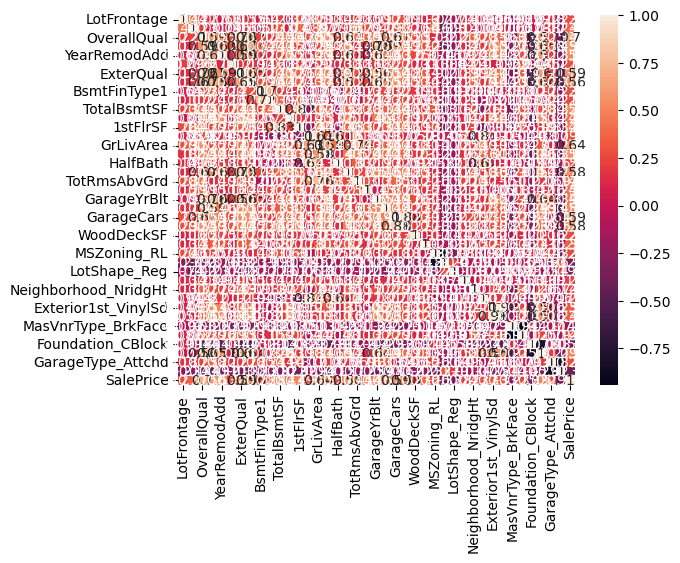

In [55]:
sns.heatmap(df_new.corr(),annot=True)

# Model selection

In [56]:
X=df_new.drop('SalePrice',axis=1)
Y=df_new['SalePrice']

In [57]:
X.head()

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0    -0.274093 -0.266799          7.0   1.060436      0.878668    1.290955   
1     0.809612  0.101854          6.0   0.145062     -0.429577   -0.595110   
2    -0.057352  0.630791          7.0   0.992630      0.830215    0.963781   
3    -0.635329  0.085825          7.0  -1.923005     -0.720298   -0.595110   
4     1.098601  1.595700          8.0   0.958727      0.733308    2.772863   

   ExterQual  BsmtQual  BsmtFinType1  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
0        4.0       4.0           6.0    0.644729    -0.589594        5.0   
1        3.0       4.0           5.0    1.287800     0.602011        5.0   
2        4.0       4.0           6.0    0.124597    -0.401755        5.0   
3        3.0       3.0           5.0   -0.513745    -0.883093        4.0   
4        4.0       4.0           6.0    0.524153     0.258618        5.0   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
0 -0.835181  1.178779   0.524793       2.0       1.0          3.0   
1  0.348826 -0.796244  -0.482008       2.0       0.0          2.0   
2 -0.648539  1.206531   0.695590       2.0       1.0          3.0   
3 -0.528972  0.952137   0.540524       1.0       0.0          3.0   
4  0.007622  1.639001   1.621487       2.0       1.0          3.0   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  \
0           8.0         0.0     1.019068           2.0         2.0   
1           6.0         1.0    -0.110619           2.0         2.0   
2           6.0         1.0     0.935387           2.0         2.0   
3           7.0         1.0     0.809867           1.0         3.0   
4           9.0         1.0     0.893547           2.0         3.0   

   GarageArea  WoodDeckSF  OpenPorchSF  MSZoning_RL  MSZoning_RM  \
0    0.421310   -0.775711     0.604457          1.0          0.0   
1   -0.020480    2.022812    -0.811305          1.0          0.0   
2    0.722530   -0.775711     0.163482          1.0          0.0   
3    0.893222   -0.775711     0.001017          1.0          0.0   
4    1.867168    1.027364     1.138269          1.0          0.0   

   LotShape_Reg  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0           1.0                   0.0                   0.0   
1           1.0                   0.0                   0.0   
2           0.0                   0.0                   0.0   
3           0.0                   0.0                   0.0   
4           0.0                   1.0                   0.0   

   HouseStyle_2Story  Exterior1st_VinylSd  Exterior2nd_VinylSd  \
0                1.0                  1.0                  1.0   
1                0.0                  0.0                  0.0   
2                1.0                  1.0                  1.0   
3                1.0                  0.0                  0.0   
4                1.0                  1.0                  1.0   

   MasVnrType_BrkFace  MasVnrType_Stone  Foundation_CBlock  Foundation_PConc  \
0                 1.0               0.0                0.0               1.0   
1                 1.0               0.0                1.0               0.0   
2                 1.0               0.0                0.0               1.0   
3                 1.0               0.0                0.0               0.0   
4                 1.0               0.0                0.0               1.0   

   GarageType_Attchd  GarageType_Detchd  
0                1.0                0.0  
1                1.0                0.0  
2                1.0                0.0  
3                0.0                1.0  
4                1.0                0.0

In [58]:
Y.head()

0    0.665182
1    0.199480
2    0.923906
3   -0.516322
4    1.380984
Name: SalePrice, dtype: float64

# Model Creation

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=99)

In [60]:
X_train.head() # contains training data features (independent variables)

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
542      0.665118  0.274960          7.0   0.890922      0.684854   -0.595110   
1406     0.087142 -0.268402          5.0   0.009451      1.072482   -0.595110   
338      1.604330  1.558835          7.0   0.416284      0.636400   -0.595110   
17       0.231636  0.483650          4.0  -0.160063     -0.865659   -0.595110   
1313     0.014895  1.760472          9.0   0.924825      0.684854    0.992649   

      ExterQual  BsmtQual  BsmtFinType1  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
542         4.0       5.0           2.0   -0.683970     1.740787        5.0   
1406        3.0       4.0           6.0    0.526517    -0.847873        3.0   
338         4.0       4.0           5.0   -0.520838     0.443522        5.0   
17          3.0       3.0           1.0   -1.024419    -0.191903        3.0   
1313        4.0       4.0           1.0   -1.024419     0.986495        5.0   

      1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
542   1.567829 -0.796244   0.457373       2.0       0.0          3.0   
1406 -1.091813 -0.796244  -1.592185       1.0       0.0          2.0   
338   1.395769 -0.796244   0.324781       2.0       0.0          3.0   
17    0.447980 -0.796244  -0.405599       2.0       0.0          2.0   
1313  0.815430  1.925773   2.522663       2.0       1.0          3.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  \
542            7.0         1.0     0.809867           3.0         2.0   
1406           5.0         0.0     0.391464           1.0         2.0   
338            8.0         0.0     0.224103           2.0         2.0   
17             6.0         0.0    -0.487181           1.0         2.0   
1313          10.0         1.0     0.851707           3.0         3.0   

      GarageArea  WoodDeckSF  OpenPorchSF  MSZoning_RL  MSZoning_RM  \
542     0.597022   -0.043212     0.882968          1.0          0.0   
1406   -0.341782   -0.231032    -0.811305          1.0          0.0   
338    -0.120887    0.238519     0.233110          1.0          0.0   
17      0.260659   -0.775711    -0.811305          1.0          0.0   
1313    1.581008   -0.775711    -0.115029          1.0          0.0   

      LotShape_Reg  Neighborhood_NoRidge  Neighborhood_NridgHt  \
542            1.0                   0.0                   0.0   
1406           1.0                   0.0                   0.0   
338            1.0                   0.0                   0.0   
17             1.0                   0.0                   0.0   
1313           0.0                   1.0                   0.0   

      HouseStyle_2Story  Exterior1st_VinylSd  Exterior2nd_VinylSd  \
542                 0.0                  1.0                  1.0   
1406                0.0                  0.0                  0.0   
338                 0.0                  0.0                  0.0   
17                  0.0                  0.0                  0.0   
1313                1.0                  1.0                  1.0   

      MasVnrType_BrkFace  MasVnrType_Stone  Foundation_CBlock  \
542                  1.0               0.0                0.0   
1406                 1.0               0.0                1.0   
338                  1.0               0.0                1.0   
17                   1.0               0.0                0.0   
1313                 1.0               0.0                0.0   

      Foundation_PConc  GarageType_Attchd  GarageType_Detchd  
542                1.0                1.0                0.0  
1406               0.0                0.0                1.0  
338                0.0                1.0                0.0  
17                 0.0                0.0                0.0  
1313               1.0                0.0                0.0

In [61]:
Y_train.head() # contains training data labels (dependent/target variable)

Id
543     0.747112
1407   -0.637059
339     0.561693
18     -1.378733
1314    2.815485
Name: SalePrice, dtype: float64

In [62]:
X_test.head() # contains testing data features (independent variables)

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
57       1.459836  0.757415          7.0   1.094338      0.927122    -0.59511   
887     -0.707576  2.302873          5.0  -0.566895     -1.447101    -0.59511   
1174     0.809612  2.333007          6.0  -1.346658     -1.689368    -0.59511   
1164     0.014895  2.203818          5.0   0.212867     -0.332670    -0.59511   
820      0.231636 -0.659175          7.0   1.060436      0.878668    -0.59511   

      ExterQual  BsmtQual  BsmtFinType1  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
57          4.0       4.0           1.0   -1.024419    -0.577854        5.0   
887         3.0       3.0           1.0   -1.024419    -0.706993        3.0   
1174        3.0       4.0           3.0    0.164789    -0.307835        3.0   
1164        3.0       4.0           5.0    0.583259     0.889640        5.0   
820         4.0       4.0           1.0   -1.024419    -0.759823        5.0   

      1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
57   -0.823516  1.192655   0.547266       2.0       1.0          3.0   
887  -0.788521  0.408659  -0.187608       1.0       1.0          2.0   
1174  0.080529  1.921148   1.951843       2.0       1.0          2.0   
1164  0.844593 -0.796244  -0.099963       1.0       1.0          3.0   
820  -1.004325  1.151027   0.367480       2.0       1.0          3.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageFinish  GarageCars  \
57             7.0         0.0     1.060908           2.0         2.0   
887            8.0         0.0    -0.989264           1.0         1.0   
1174           9.0         1.0    -1.951590           1.0         2.0   
1164           5.0         1.0    -0.026938           1.0         2.0   
820            6.0         0.0     1.019068           2.0         2.0   

      GarageArea  WoodDeckSF  OpenPorchSF  MSZoning_RL  MSZoning_RM  \
57      0.506656   -0.775711     0.813340          1.0          0.0   
887    -0.823735    0.360602    -0.811305          1.0          0.0   
1174   -0.522514   -0.775711    -0.811305          1.0          0.0   
1164    0.622123    0.801980    -0.231075          1.0          0.0   
820     0.657266   -0.775711     0.233110          1.0          0.0   

      LotShape_Reg  Neighborhood_NoRidge  Neighborhood_NridgHt  \
57             0.0                   0.0                   0.0   
887            0.0                   0.0                   0.0   
1174           0.0                   0.0                   0.0   
1164           0.0                   0.0                   0.0   
820            0.0                   0.0                   0.0   

      HouseStyle_2Story  Exterior1st_VinylSd  Exterior2nd_VinylSd  \
57                  1.0                  1.0                  1.0   
887                 0.0                  0.0                  0.0   
1174                1.0                  0.0                  0.0   
1164                0.0                  0.0                  0.0   
820                 1.0                  1.0                  1.0   

      MasVnrType_BrkFace  MasVnrType_Stone  Foundation_CBlock  \
57                   1.0               0.0                0.0   
887                  1.0               0.0                0.0   
1174                 1.0               0.0                0.0   
1164                 1.0               0.0                0.0   
820                  1.0               0.0                0.0   

      Foundation_PConc  GarageType_Attchd  GarageType_Detchd  
57                 1.0                1.0                0.0  
887                1.0                1.0                0.0  
1174               0.0                0.0                1.0  
1164               1.0                1.0                0.0  
820                1.0                1.0                0.0

In [63]:
Y_test.head() # contains testing data labels (dependent/target variable)

Id
58      0.458204
888    -0.593939
1175    1.191254
1165    0.415083
821     0.225352
Name: SalePrice, dtype: float64

* ## Applying different Machine learning model to measure the perfomance of the model

## APPLY REGREESSION MODELS

In [64]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

import optuna # For hyperparameter tuning
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [66]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [67]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost":AdaBoostRegressor(),
    "Gradiant Boosting":GradientBoostingRegressor(),
    "XGBOOSTING":XGBRegressor(),
    "SVR":SVR(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.5276
- Mean Absolute Error: 0.3618
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5209
- Mean Absolute Error: 0.3623
- R2 Score: 0.6895


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0151
- Mean Absolute Error: 0.8007
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9378
- Mean Absolute Error: 0.7251
- R2 Score: -0.0064


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.5276
- Mean Absolute Error: 0.3615
- R2 Score: 0.7299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5205
- Mean Absolute Error: 0.3616
- R2 Score: 0.6900


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.4467
- Mean Absolute Error: 0.3052
- R2 Score: 0.8063
----------------------

In [68]:
# Above overfitting issue comes in some models so i try to overcome the overfitting.


In [69]:

# Custom optimized models:

optimized_decision_tree = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)

optimized_random_forest = RandomForestRegressor(
    n_estimators=500,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="sqrt",
    bootstrap=True
)

optimized_gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.7,
    max_features="sqrt"
)

optimized_xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=1,
    gamma=0.1,
    objective="reg:squarederror"
)

optimized_svr = SVR(
    kernel="rbf",
    C=10,
    epsilon=0.1,
    gamma="scale"
)




# ==========================================================
# ALL MODELS (Optimized + Baseline)
# ==========================================================

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),

    # Optimized Decision Tree
    "Decision Tree": optimized_decision_tree,

    # Optimized Random Forest
    "Random Forest Regressor": optimized_random_forest,

     # Optimized AdaBoost

    "Adaboost": adaboost_opt,

    # Optimized Gradient Boosting
    "Gradient Boosting": optimized_gbr,

    # Optimized XGBoost
    "XGBOOSTING": optimized_xgb,

    # Optimized SVR
    "SVR": optimized_svr,
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')


NameError: name 'adaboost_opt' is not defined

### Hyperparameter Tunning

In [ ]:
# Here i choose only 5 model for hyperparameter Tunning because linear regression,Lidge and rasso has no Hyperparameter and adaboost not perform well.

In [ ]:
knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11, 13, 15, 20, 25, 30, 40, 50],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2]  
}


gbr_params = {
    "n_estimators": [200, 300, 500, 700],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 3, 5, 10],
    "subsample": [0.6, 0.7, 0.8, 1.0],
    "max_features": ["sqrt", "log2", None]
}


rf_params = {
    "n_estimators": [200, 300, 500, 800],
    "max_depth": [8, 10, 12, 15, None],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False]
}

xgb_params = {
    "n_estimators": [300, 500, 700],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth": [3, 4, 5, 6],
    "subsample": [0.6, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.5],
    "reg_alpha": [0, 0.1, 0.5, 1],
    "reg_lambda": [0.5, 1, 2, 3],
    "min_child_weight": [1, 3, 5, 7],
    "objective": ["reg:squarederror"]
}

svr_params = {
    "kernel": ["rbf", "poly", "linear"],
    "C": [0.1, 1, 5, 10, 20, 50],
    "epsilon": [0.01, 0.05, 0.1, 0.2],
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4]  
}


In [ ]:
# Models list for Hyperparameter tuning

randomcv_models = [('knn_params', KNeighborsRegressor(), knn_params),
                    ('gbr_params', GradientBoostingRegressor(), gbr_params),
                   ('rf_params', RandomForestRegressor(), rf_params),
                   ('xgb_params', XGBRegressor(), xgb_params),
                   ('svr_params', SVR(), svr_params)
                  
                   
                   ]

In [ ]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, Y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

In [ ]:
##  after hyperparamter Beginning Model Training with best parameter

knn=KNeighborsRegressor(
    weights= 'distance',
    p= 2,
    n_neighbors= 13,
    metric= 'manhattan'
)

gbr = GradientBoostingRegressor(
    n_estimators=200,
    subsample=1.0,
    max_features="log2",
    max_depth=5,
    learning_rate=0.03,
    min_samples_split= 5,
    min_samples_leaf= 3
)

rf = RandomForestRegressor(
     n_estimators=800,
     min_samples_split=2,
     min_samples_leaf=1,
     max_features="log2",
     max_depth=15,
     bootstrap=False
)

xgb = XGBRegressor(
    subsample=0.6,
    reg_lambda=1,
    reg_alpha=0.5,
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=4,
    learning_rate=0.03,
    gamma=0,
    colsample_bytree=0.8,
    eval_metric='rmse',
    min_child_weight= 7
)

svr = SVR(
    kernel='rbf',
    gamma='auto',
    epsilon=0.1,
    C=10,
    degree= 4
    
)




models = {
    "Gradient Boosting": gbr,
    "Random Forest": rf,
    "XGBoost": xgb,
    "SVR": svr,
    "KNN":knn
}



# Training Loop
# ============================

for name, model in models.items():

    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    print("\n==============================")
    print(f"Mode Name: {name}")
    print("==============================")

    print("Training Performance:")
    print(f"RMSE: {model_train_rmse:.4f}")
    print(f"MAE: {model_train_mae:.4f}")
    print(f"R²: {model_train_r2:.4f}")

    print("\nTest Performance:")
    print(f"RMSE: {model_test_rmse:.4f}")
    print(f"MAE: {model_test_mae:.4f}")
    print(f"R²: {model_test_r2:.4f}")


# MODEL COMPARISION REPORT

In [ ]:


# Model performance data
data = {
    "Model": ["Gradient Boosting", "Random Forest", "XGBoost", "SVR", "KNN"],

    "Train RMSE": [0.2532, 0.0357, 0.2852, 0.1762, 0.0040],
    "Train R2":   [0.9378, 0.9988, 0.9211, 0.9699, 1.0000],

    "Test RMSE":  [0.4756, 0.4761, 0.4716, 0.5032, 0.5018],
    "Test R2":    [0.7412, 0.7407, 0.7455, 0.7103, 0.7118]
}

# Create DataFrame
df_report = pd.DataFrame(data)

# # Sort by best Test R² (higher is better)
# df_report = df_report.sort_values(by="Test R2", ascending=False)

print("=== Model Comparison Report ===")
print(df_report)


# Conclusion of Model

I have used 9 Algorithms which name are Linear Regression,Ridge Regression,Lasso Regression,KNeighborsRegressor,DecisionTree Regressor,AdaBoostRegressor,GradientBoostingRegressor,XGBRegressor and Support Vector Regressor(SVR) for training and testing the model.
I select __XGBoost__ which is maximum than all Algorithms and its working Mindblowing some time prediction margin are few far even,after that model predict perfect result.
So,I am perfering __XGBoost__ for predicting the House Price Prediction.

# Report On Challenges Faced

* This is a __House Price  prediction__ which has __1460__ entries,and total columns are __80__. where 37 Numerical Features,43 Categorical Features,18 Discrete Features,19 Continuous Features
* The dataset had many category-based columns, and choosing the right encoding (one-hot or ordinal) was challenging.
* There are 19 continuous feature in our dataset in which i had handled Outliers.
* The toughest part is feature selection because using heatmap we can't decide that which column is most important so i use __SelectKBest__ feature selection technique .
* Many models performed differently; comparing them and avoiding overfitting required careful evaluation.
* Boosting models and tuning took longer to train, especially with large parameter ranges.
  

## Pickle is used to save and load a model

In [ ]:
pickle.dump(xgb, open("XGB_Model.pkl", "wb"))
print("XGBoost model saved successfully!")